In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

In [44]:
arquivo = pd.read_csv('/content/drive/MyDrive/grafo.csv', delimiter=',')

In [227]:
#definindo G como um grafo direcionado
G = nx.DiGraph()

#recuperando as arestas e vertices do arquivo
V = set(arquivo['Vi'])
vi = list(arquivo['Vi'])
vj = list(arquivo['Vj'])
E = [(vi[k], vj[k]) for k in range(len(vi))]

In [228]:
#adicionando os vertices e as arestas a G
G.add_nodes_from(V)
G.add_edges_from(E)

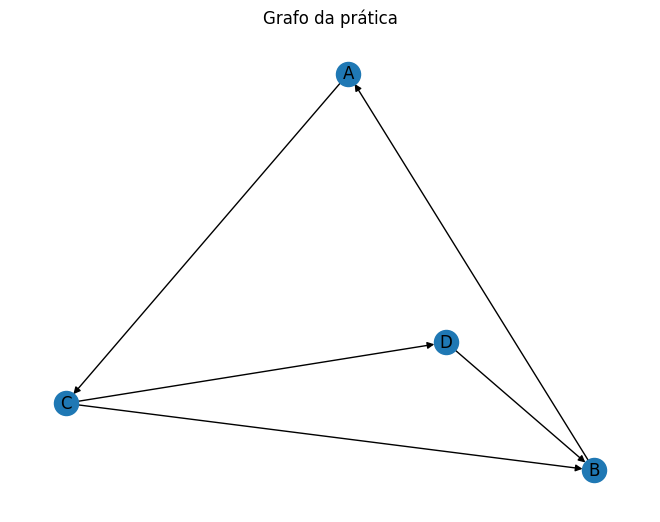

In [246]:
#plotando o grafo
nx.draw(G, with_labels=True)
plt.title("Grafo da prática")
plt.show()

## Explorando propriedades da biblioteca, tais como fecho transitivo direto e inverso

In [52]:
G.degree(["A", "B"])

DiDegreeView({'A': 2, 'B': 3})

In [68]:
list(G.adj["C"])

['B', 'D']

Criando uma função para calcular $N^+(R^+)$ e $N^-(R^-)$

In [214]:
def Nplus(G, vertices):
  Np = set()
  for v in vertices:
    corrente = set(G.neighbors(v)).union({v})
    Np = Np.union(corrente)

  return Np

def Nminus(G, vertices):
  Nm = set()

  for v in vertices:
    predecessores = set(pred for pred in G.predecessors(v))
    Nm = Nm.union(predecessores)

  return Nm

##Adaptação do algoritmo descrito em sala para código

In [ ]:
#def meu_fconexos(G): #Não funciona, deixei de consertar e parti para uma solucao conhecida
#  k = 0
#  V = list(G.nodes)
#
#  while V:
#    v = random.choice(V)
#    Wk = set()
#    Rp = {v}
#    Rm = {v}
#
#    while Nplus(G, Rp).difference(Rp):
#      Wk = Wk.union(Nplus(G, Rp).difference(Rp))
#      Rp = Rp.union(Wk)
#
#    while Nminus(G, Rm).difference(Rm):
#      Wk = Wk.union(Nminus(G, Rm).difference(Rm))
#      Rm = Rm.union(Wk)
#
#    Wk = Rp.union(Rm)
#    V = V.difference(Wk)
#    k += 1

##**Algoritmo final de f-conectivade**

In [215]:
def fconexos(G):
    G_reverso = G.reverse()
    visitados = set()
    tempo_finalizacao = []

    def dfs1(vi):
        visitados.add(vi)
        for adjacente in G.neighbors(vi):
            if adjacente not in visitados:
                dfs1(adjacente)
        tempo_finalizacao.append(vi)

    for vi in G.nodes():
        if vi not in visitados:
            dfs1(vi)

    visitados.clear()
    componentes_fconexos = []

    def dfs2(vi, componente):
        visitados.add(vi)
        componente.add(vi)
        for adjacente in G_reverso.neighbors(vi):
            if adjacente not in visitados:
                dfs2(adjacente, componente)

    while tempo_finalizacao:
        vi = tempo_finalizacao.pop()
        if vi not in visitados:
            componente = set()
            dfs2(vi, componente)
            componentes_fconexos.append(componente)

    return componentes_fconexos

##Testando com o grafo do exercício e o grafo usado em sala de aula

In [247]:
scn = nx.strongly_connected_components(G)
print(f"Resultado da bilbioteca: {list(scn)}\nResultado do algoritmo implementado: {fconexos(G)}")

Resultado da bilbioteca: [{'D', 'C', 'A', 'B'}]
Resultado do algoritmo implementado: [{'D', 'B', 'A', 'C'}]


In [233]:
Gaula = nx.DiGraph()
Gaula.add_nodes_from([i for i in range(1, 8)])
Gaula.add_edges_from([
    (1, 2),
    (1, 3),
    (2, 6),
    (2, 4),
    (3, 4),
    (4, 3),
    (5, 1),
    (5, 2),
    (6, 5),
    (7, 5),
    (7, 8),
    (8, 6),
    (8, 7)
])

In [239]:
scn = nx.strongly_connected_components(Gaula)
print(f"Resultado da bilbioteca: {list(scn)}\nResultado do algoritmo implementado: {fconexos(Gaula)}")

Resultado da bilbioteca: [{3, 4}, {1, 2, 5, 6}, {8, 7}]
Resultado do algoritmo implementado: [{8, 7}, {1, 2, 5, 6}, {3, 4}]


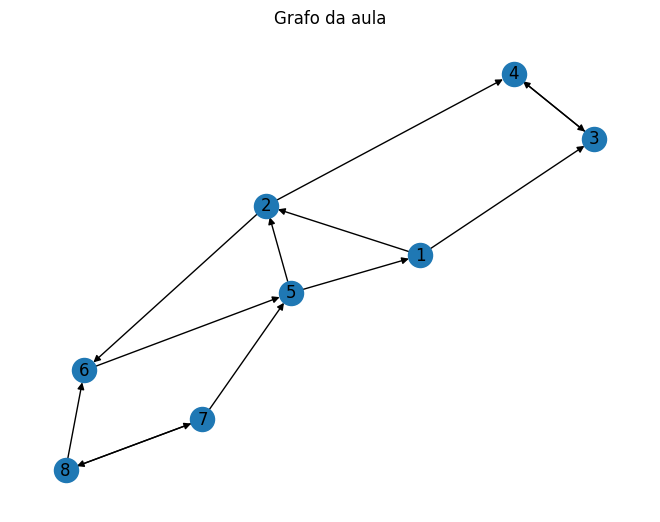

In [244]:
nx.draw(Gaula, with_labels = True)
plt.title("Grafo da aula")
plt.show()